# Baseline BERT Results

## BERT Setup

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

c:\Users\Albert Huang\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\Albert Huang\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\Albert Huang\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Albert Huang\anaconda3\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current defau

In [2]:
import pandas as pd

def map_star_to_sentiment(star):
    if '1 star' in star or '2 stars' in star:
        return "negative"
    elif '3 stars' in star:
        return "neutral"
    else:
        return "positive"

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
tokenizer_kwargs = {'padding':True,'truncation':True,'max_length':512}

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_confusion(filename, fig_name):
    df = pd.read_csv(filename, encoding='utf-8')

    df['star_level'] = df['text'].apply(lambda x: classifier(x, **tokenizer_kwargs)[0]['label'])

    df['baseline'] = df['star_level'].apply(map_star_to_sentiment)

    accuracy = (df['sentiment'] == df['baseline']).mean()

    print(f"Accuracy: {accuracy * 100:.2f}%\n")

    ground_order = ['positive', 'neutral', 'negative']
    pred_order = ['positive', 'neutral', 'negative']


    confusion_matrix = pd.crosstab(df['sentiment'], df['baseline'],
                               rownames=['Ground Truth'], colnames=['Predicted'],)
    confusion_matrix = confusion_matrix.reindex(index=ground_order, columns=pred_order)

    print(confusion_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

    plt.title(fig_name)
    plt.ylabel('Ground Truth Label')
    plt.xlabel('Predicted Label')

    plt.show()

## Baseline BERT Results

### 2020 Election Cycle Accuracy

In [3]:
df = pd.read_csv('./data/labeled_comments_2020.csv', encoding='utf-8')

df['star_level'] = df['text'].apply(lambda x: classifier(x, **tokenizer_kwargs)[0]['label'])

df['baseline'] = df['star_level'].apply(map_star_to_sentiment)

In [4]:
df.head(5)

,text,created_utc,ups,subreddit,neg,neu,pos,compound,sentiment,star_level,baseline
0,"Very true, but the problem is that even at tha...",1590975768,1,democrats,0.239,0.645,0.116,-0.9769,negative,3 stars,neutral
1,You’re full of crap.\r\n\r\nYou present no fac...,1590984758,2,democrats,0.163,0.692,0.145,-0.1101,negative,1 star,negative
2,"Politically speaking, there is absolutely no w...",1590995791,29,democrats,0.062,0.823,0.115,0.9925,positive,2 stars,negative
3,This is what happens when the president of the...,1591008451,1,democrats,0.000,0.903,0.097,0.4215,positive,1 star,negative
4,Silly comment. No matter how bad a president h...,1591013669,1,democrats,0.261,0.647,0.092,-0.8060,negative,3 stars,neutral


In [5]:
accuracy = (df['sentiment'] == df['baseline']).mean()

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 51.52%


In [6]:
confusion_matrix = pd.crosstab(df['sentiment'], df['baseline'],
                               rownames=['Ground Truth'], colnames=['Predicted'],)

print(confusion_matrix)

Predicted     negative  neutral  positive
Ground Truth                             
negative            74        7        12
neutral             10        4         5
positive            52       10        24


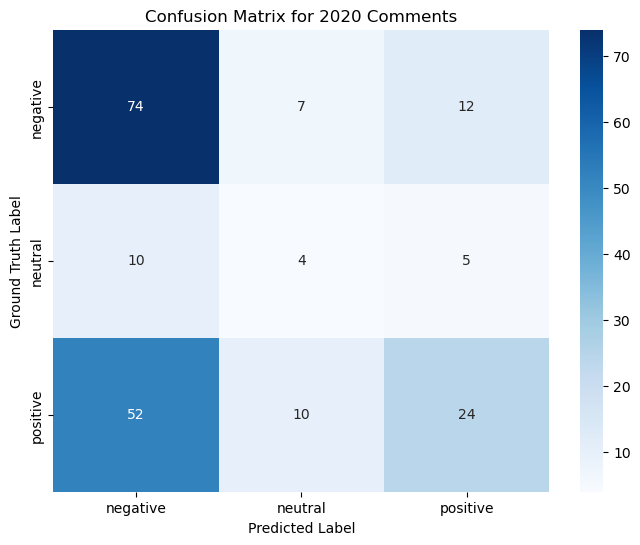

In [7]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

# Add labels and title
plt.title('Confusion Matrix for 2020 Comments')
plt.ylabel('Ground Truth Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()

In [8]:
# def calculate_metrics(conf_matrix, true_class):
#     tp = conf_matrix.at[true_class, f'false_{true_class.split("_")[1]}'] if f'false_{true_class.split("_")[1]}' in conf_matrix.columns else 0

#     fp = conf_matrix[f'false_{true_class.split("_")[1]}'].sum() - tp if f'false_{true_class.split("_")[1]}' in conf_matrix.columns else 0

#     fn = conf_matrix.loc[true_class].sum() - tp if true_class in conf_matrix.index else 0

#     precision = tp / (tp + fp) if (tp + fp) > 0 else 0
#     recall = tp / (tp + fn) if (tp + fn) > 0 else 0
#     f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

#     return precision, recall, f1_score

# for label in confusion_matrix.index:
#     precision, recall, f1_score = calculate_metrics(confusion_matrix, label)
#     print(f"Class {label}:")
#     print(f" Precision: {precision:.2f}")
#     print(f" Recall: {recall:.2f}")
#     print(f" F1-Score: {f1_score:.2f}")
#     print()

### 2024 Election Cycle Accuracy

In [9]:
df = pd.read_csv('./data/labeled_comments_2024.csv', encoding='utf-8')

df['star_level'] = df['text'].apply(lambda x: classifier(x, **tokenizer_kwargs)[0]['label'])

df['baseline'] = df['star_level'].apply(map_star_to_sentiment)

In [10]:
accuracy = (df['sentiment'] == df['baseline']).mean()

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.00%


Accuracy: 51.52%

Predicted     positive  neutral  negative
Ground Truth                             
positive            24       10        52
neutral              5        4        10
negative            12        7        74


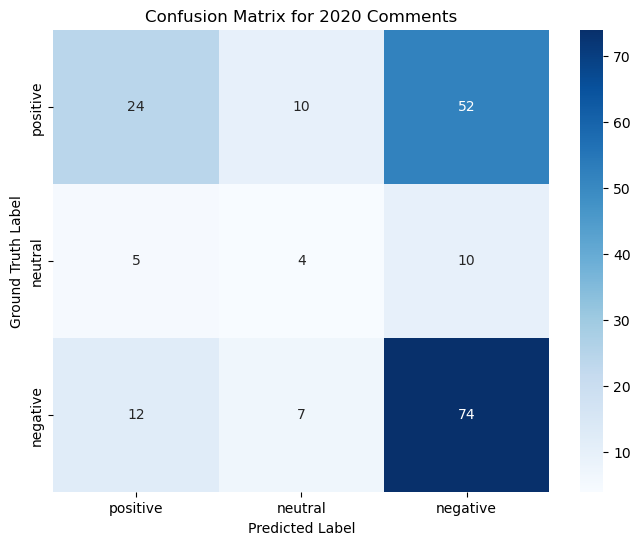

In [4]:
get_confusion('./data/labeled_comments_2020.csv', 'Confusion Matrix for 2020 Comments')

Accuracy: 50.00%

Predicted     positive  neutral  negative
Ground Truth                             
positive            30       18        46
neutral              5        2        13
negative             9        9        68


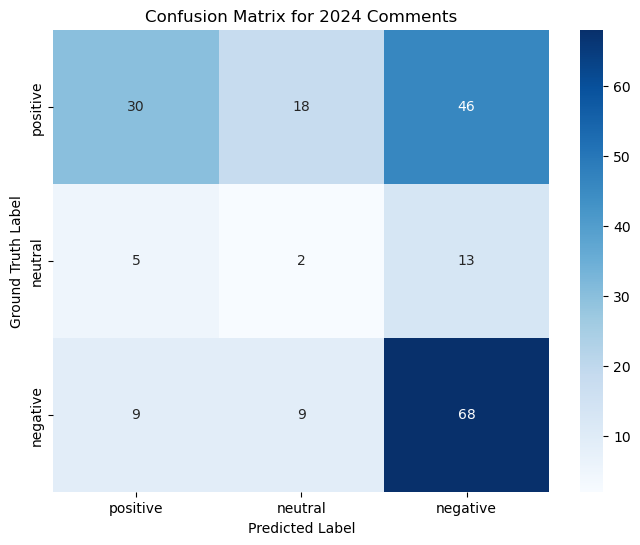

In [5]:
get_confusion('./data/labeled_comments_2024.csv', 'Confusion Matrix for 2024 Comments')

Accuracy: 51.00%

Predicted     positive  neutral  negative
Ground Truth                             
positive            31        2        29
neutral             22        2        32
negative            12        1        69


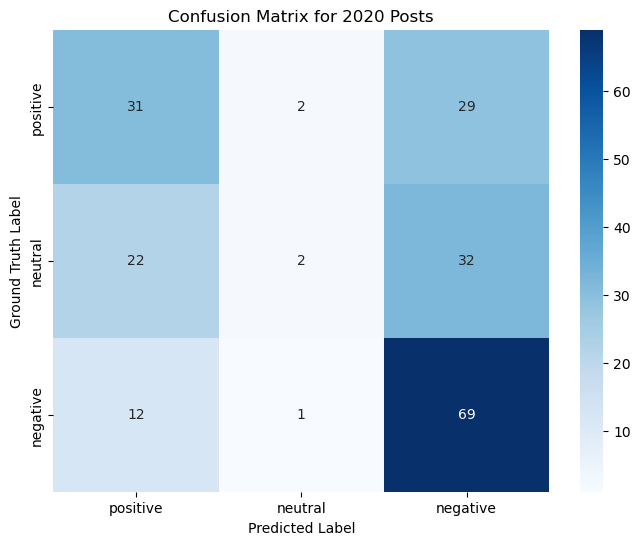

In [6]:
get_confusion('./data/labeled_posts_2020.csv', 'Confusion Matrix for 2020 Posts')

Accuracy: 48.00%

Predicted     positive  neutral  negative
Ground Truth                             
positive            42        7        37
neutral             25        3        30
negative             3        2        51


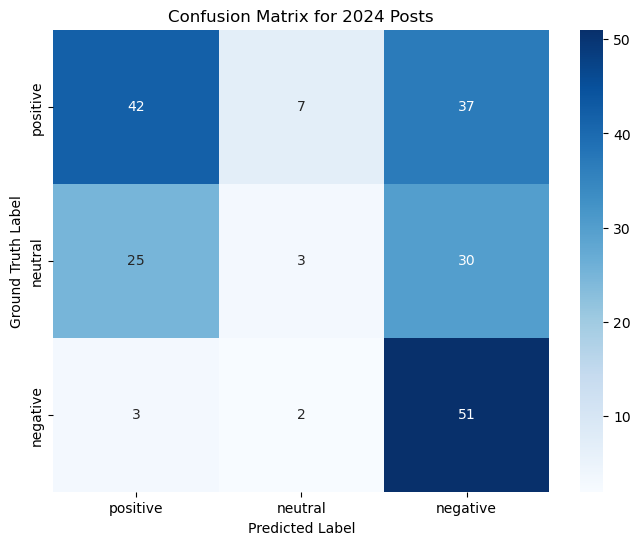

In [7]:
get_confusion('./data/labeled_posts_2024.csv', 'Confusion Matrix for 2024 Posts')